In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
wine_dataset = pd.read_csv('winequality-red.csv')

In [3]:
wine_dataset.shape

(1599, 12)

In [4]:
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine_dataset['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [6]:
wine_dataset.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [7]:
wine_dataset.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

##### Visualizations

In [8]:
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


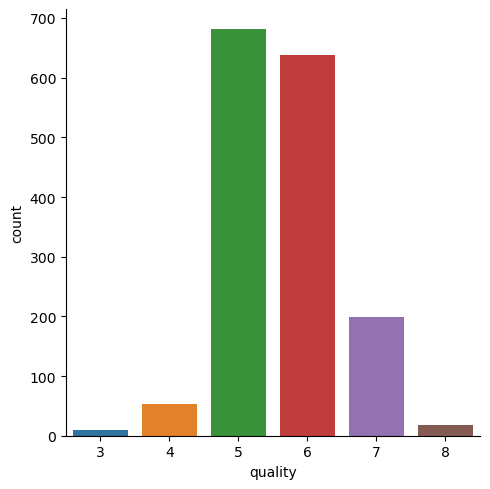

In [9]:
sns.catplot(x = 'quality', data = wine_dataset, kind='count')

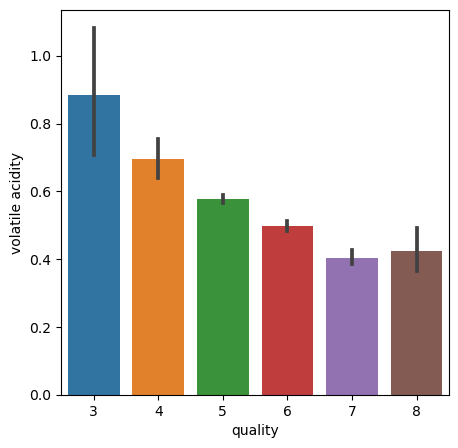

In [20]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='volatile acidity', data=wine_dataset)
plt.show()

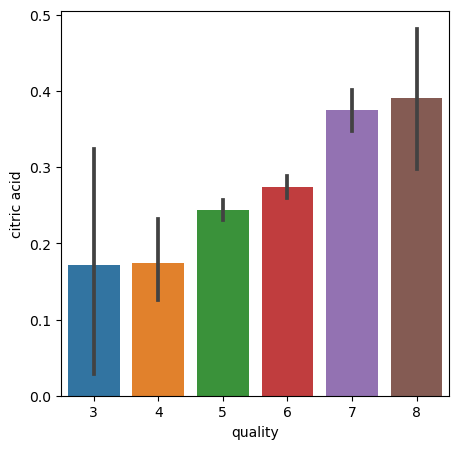

In [21]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='citric acid', data=wine_dataset)
plt.show()

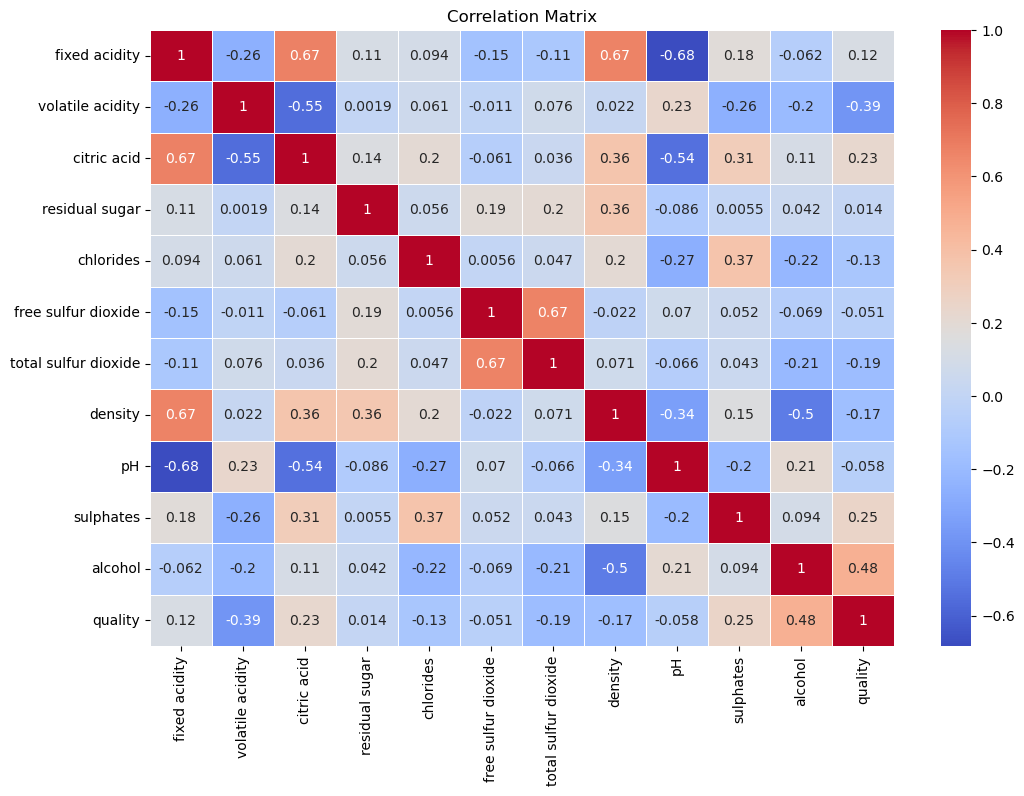

In [22]:
#creating correlation matrix to see if any correlations exist between columns
correlation_matrix = wine_dataset.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

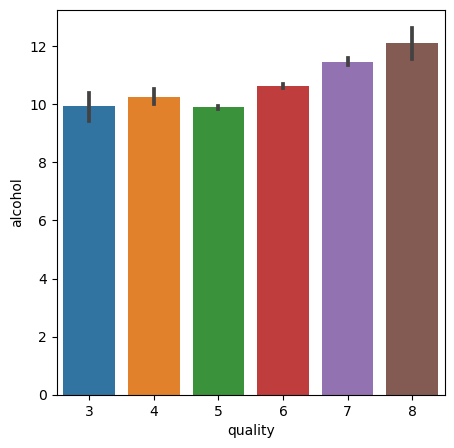

In [23]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='alcohol', data=wine_dataset)
plt.show()

##### Data Preprocessing

In [26]:
X = wine_dataset.drop(columns = 'quality', axis = 1)

##### Label Binarization

In [28]:
#we are binarizing the data in a way where if quality is <6 its bad and if its >6 its good meaning 1 = good bad is 0
Y = wine_dataset['quality'].apply(lambda y_value: 1 if y_value >=7 else 0)

In [31]:
Y.value_counts()

0    1382
1     217
Name: quality, dtype: int64

##### Train test split

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = .1)

In [33]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1599,) (1439,) (160,)


##### Model Training

In [35]:
model = RandomForestClassifier()

In [36]:
model.fit(X_train, Y_train)

RandomForestClassifier()

##### Model Eval

In [38]:
#Accuracy score
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy:', test_data_accuracy)

Accuracy: 0.91875


##### Building a predictive system

In [44]:
input_data = (8.9,0.62,0.18,3.8,0.17600000000000002,52.0,145.0,0.9986,3.16,0.88,9.2)
input_data_as_nparray = np.asarray(input_data)
input_data_reshape = input_data_as_nparray.reshape(1,-1)
prediction = model.predict(input_data_reshape)
print(prediction)

if (prediction[0] ==1):
    print('The wine is good')
else:
    print('The wine is bad')

[0]
The wine is bad


C:\Users\Zooby\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
